In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.io as sio
import h5py
import scipy.signal as scisig
import importlib
import analysis_utils as au
import cmath

In [4]:
filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\Charging\Before_filament\Before_filament_1.mat'
data = sio.loadmat(filename)
D = np.transpose(data['D'])[0]
G = np.transpose(data['G'])[0]
dt = data['Tinterval'][0][0]

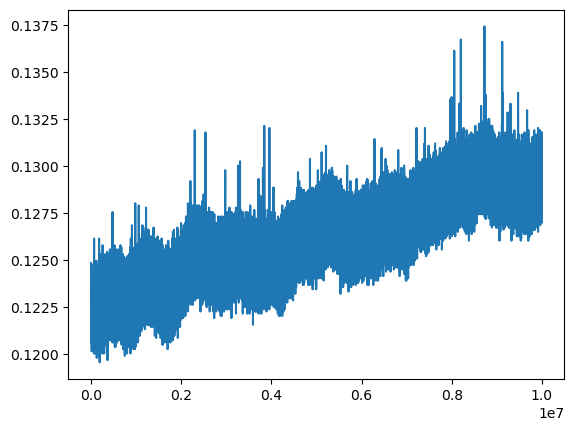

In [5]:
plt.plot(G)

In [2]:
Gs = np.zeros((3, 10**7))
Ds = []
for n, i in enumerate(['1', '2', '3']):
    filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\Charging\Low charge\Low charge_'+i+'.mat'
    data = sio.loadmat(filename)
    G = np.transpose(data['G'])[0]
    D = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    Gs[n] = G
    Damp = []
    for j in range(100):
        PSD = scisig.welch(D[j*10**5:(j+1)*10**5], fs=1/dt, nperseg=10**5)
        Damp.append(PSD[1][12000])
    Ds.append(Damp)

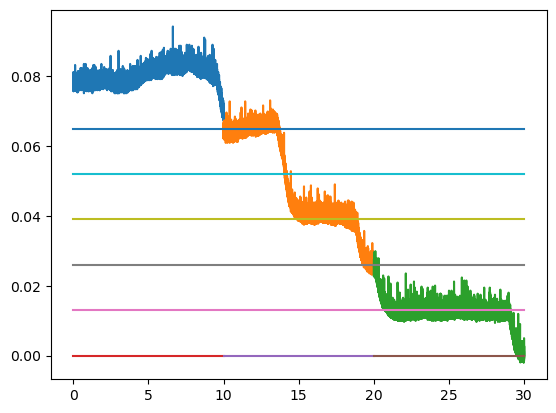

In [3]:
time = np.linspace(0, 10, len(G))
for n, G in enumerate(Gs):
    plt.plot(n*10 + time, G) 
for n, D in enumerate(Ds):
    time = np.linspace(0, 10, len(D))
    plt.plot(n*10 + time, D) 
plt.plot([0, 30], [0.013, 0.013])
plt.plot([0, 30], [0.026, 0.026])
plt.plot([0, 30], [0.039, 0.039])
plt.plot([0, 30], [0.052, 0.052])
plt.plot([0, 30], [0.065, 0.065])

In [15]:
Gs = np.zeros((3, 10**7))
for n, i in enumerate(['1', '2', '3']):
    filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\Charging\Low charge 2\Low charge 2_'+i+'.mat'
    data = sio.loadmat(filename)
    G = np.transpose(data['G'])[0]
    dt = data['Tinterval'][0][0]
    Gs[n] = G

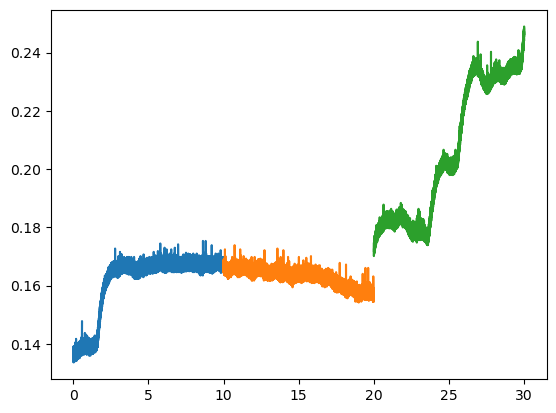

In [16]:
time = np.linspace(0, 10, len(G))
for n, G in enumerate(Gs):
    plt.plot(n*10 + time, G) 

In [41]:
Ds = []
for n, i in enumerate(['3', '4', '5']):
    if i == '3':
        filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\Charging\Charge 3\Charge '+i+'_1.mat'
    else:
        filename = r'D:\Lab Data\lorentz_force\sphere20250507\20250528\Charging\Charge '+i+'.mat'
    data = sio.loadmat(filename)
    D = np.transpose(data['D'])[0]
    dt = data['Tinterval'][0][0]
    Damp = []
    for j in range(100):
        PSD = scisig.welch(D[j*10**5:(j+1)*10**5], fs=1/dt, nperseg=10**5)
        Damp.append(PSD[1][12000])
    Ds.append(Damp)

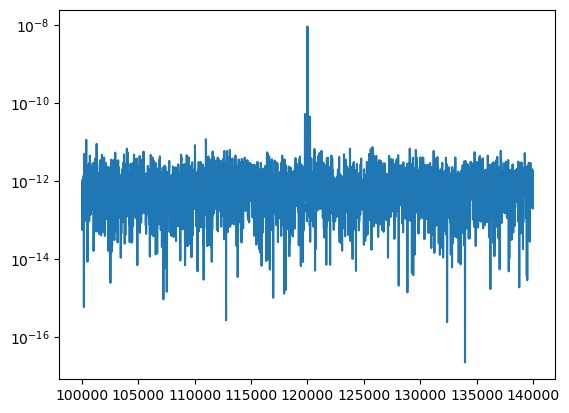

In [42]:
plt.plot(PSD[0][10000:14000], PSD[1][10000:14000])
plt.yscale('log')

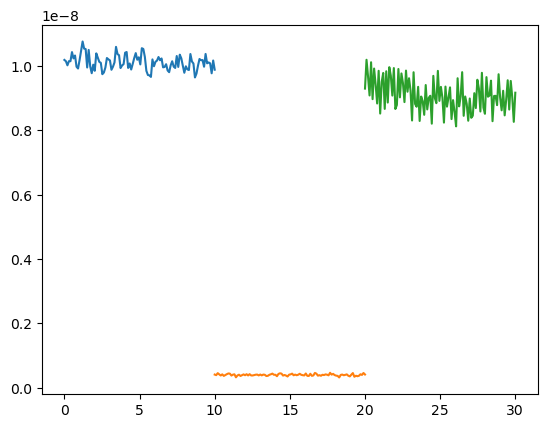

In [43]:

for n, D in enumerate(Ds):
    time = np.linspace(0, 10, len(D))
    plt.plot(n*10 + time, D) 